In [1]:
import pandas as pd
import time
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix

In [2]:
import pandas as pd
import numpy as np
df=pd.read_excel("F:\\Amrita\\5th semester_2024\\Machine Learning\\Lab-3\\Project Dataset.xlsx")
df


,BMI,4. Age (in years),5. Height (in cms),6. Weight (in kgs),Financial insecurity faced due to lockdown,5. Is not being able to hangout and meet your friends and classmates in any way affecting your mental health?,7. How is home quarantine (unable to go out) impacting you?,8. When did you have more free time?,9. How many days in a week do you practice meditation?,"19. Out of the following, choose 5 tools which you use most often these days.",17. Are you happy with online classes?,18. How would you rate your mental well being ?,17. Average sleeping hours per day,5. Problems faced after attending online classes,2. Posture related problems faced after attending online classes,6. How is online classes impacting your academic performance?,Rate_your_mental_well_being,mentalh_level,to
0,27.887617,45,155.0,67.0,6,Yes,No affect,Before lockdown,1,11,No,5,6 to 8 hours,"Dry eyes, Blurred vision, Computer eye syndrom...","Back pain, Neck pain, Body aches and pains, hgfhj",negative,5,Bad,0.002789
1,26.609713,20,169.0,76.0,1,Yes,No affect,Before lockdown,0,11,Yes,10,4 to 6 hours,"Dry eyes, Headaches, Fatigue, Itchy eyes","Neck pain, Body aches and pains",No effect,10,Good,0.002661
2,20.613131,23,151.0,47.0,3,Yes,No affect,After lockdown,0,11,Yes,5,6 to 8 hours,"Dry eyes, Red eyes, Blurred vision, Headaches,...","Back pain, Neck pain, Body aches and pains",Unaffected,5,Bad,0.002061
3,21.224490,19,175.0,65.0,2,Yes,Negative impact,After lockdown,0,12,No,7,8 to 10 hours,"Blurred vision, Fatigue, Itchy eyes, Eye strai...","Back pain, Neck pain, Rounded shoulders, Body ...",poor performance,7,Good,0.002122
4,17.959184,20,175.0,55.0,8,Yes,Negative impact,Before lockdown,0,17,No,4,4 to 6 hours,Red eyes,Neck pain,Badly,4,Bad,0.001796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,17.474717,36,164.0,47.0,8,No,Negative impact,Unchanged,0,5,No,5,6 to 8 hours,"Dry eyes, Headaches, Sensitivity of light",Neck pain,I attended less classes because of covid-19 an...,5,Bad,0.001747
185,16.528926,16,165.0,45.0,5,Yes,No affect,Unchanged,0,8,No,7,6 to 8 hours,"Dry eyes, Red eyes, Headaches, Itchy eyes, Eye...","Rounded shoulders, Head that either leans forw...",Worsening,7,Good,0.001653
186,22.640865,37,153.0,53.0,4,Yes,Negative impact,After lockdown,3,12,Yes,8,8 to 10 hours,"Dry eyes, Blurred vision, Sensitivity of light",Comfortable,Improved concentration,8,Good,0.002264
187,20.811655,19,155.0,50.0,1,Yes,Negative impact,Unchanged,0,16,No,6,6 to 8 hours,"Dry eyes, Red eyes, Blurred vision, Headaches,...","Back pain, Neck pain, Rounded shoulders, Bent ...",Less efficiency,6,Good,0.002081


In [3]:
#A1
Good_rate=[]
Bad_rate=[]
for index,row in df.iterrows():
    if row['Rate_your_mental_well_being ']>=8:
        Good_rate.append(row['Rate_your_mental_well_being '])
    elif row['Rate_your_mental_well_being ']<8:
        Bad_rate.append(row['Rate_your_mental_well_being '])
Good_rate_mean=np.mean(Good_rate)
Bad_rate_mean=np.mean(Bad_rate)
Good_rate_std=np.std(Good_rate)
Bad_rate_std=np.std(Bad_rate)
Interclass=np.linalg.norm(Bad_rate_mean-Good_rate_mean)
print("The good rate mean : ",Good_rate_mean)
print("The bad rate mean : ",Bad_rate_mean)
print("The good rate standard deviation : ",Good_rate_std)
print("The bad rate standard deviation : ",Bad_rate_std)
print("The distance between mean vectors between classes : ",Interclass)

The good rate mean :  8.891304347826088
The bad rate mean :  5.525773195876289
The good rate standard deviation :  0.7725806801702982
The bad rate standard deviation :  1.3779768787816422
The distance between mean vectors between classes :  3.3655311519497992


In [4]:
#A1
Good_rate=[]
Bad_rate=[]
for index,row in df.iterrows():
    if row['Rate_your_mental_well_being ']>=8:
        Good_rate.append(row['Rate_your_mental_well_being '])
    else:
    #elif row['Rate_your_mental_well_being ']<8:
        Bad_rate.append(row['Rate_your_mental_well_being '])
Good_rate_mean=np.mean(Good_rate)
Bad_rate_mean=np.mean(Bad_rate)
Good_rate_std=np.std(Good_rate)
Bad_rate_std=np.std(Bad_rate)
centroid=np.linalg.norm(Bad_rate_mean-Good_rate_mean)
print("The good rate mean : ",Good_rate_mean)
print("The bad rate mean : ",Bad_rate_mean)
print("The good rate standard deviation : ",Good_rate_std)
print("The bad rate standard deviation : ",Bad_rate_std)
print("The distance between mean vectors between classes : ",centroid)

The good rate mean :  8.891304347826088
The bad rate mean :  5.525773195876289
The good rate standard deviation :  0.7725806801702982
The bad rate standard deviation :  1.3779768787816422
The distance between mean vectors between classes :  3.3655311519497992


(array([ 1.,  2.,  5., 14., 19., 27., 29., 33., 36., 23.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <BarContainer object of 10 artists>)

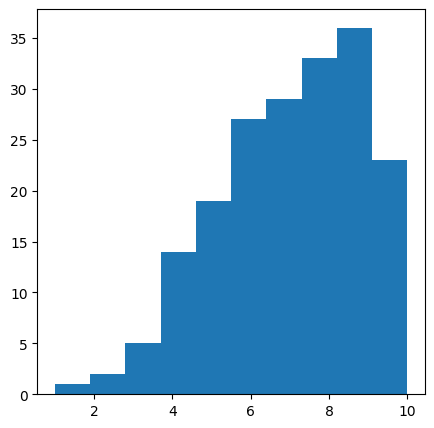

In [5]:
#A2
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.hist(df['Rate_your_mental_well_being '])


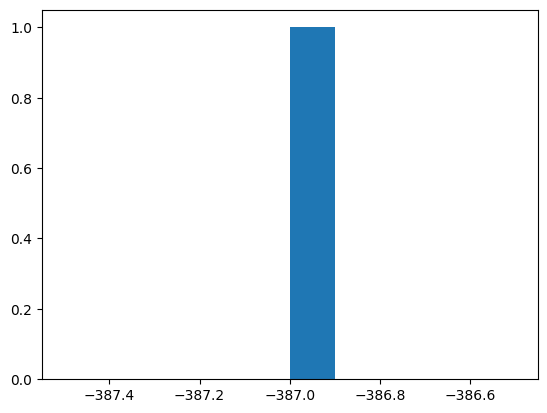

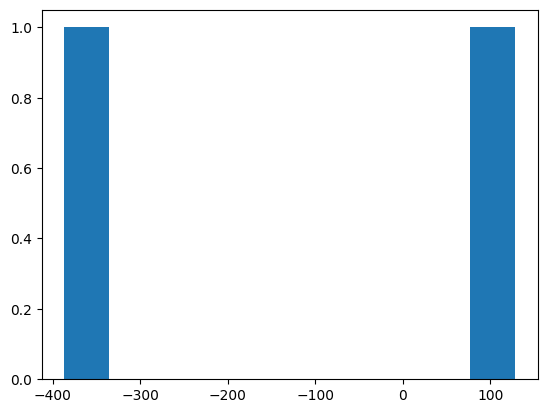

c:\Users\Hitesh\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\histograms.py:852: ComplexWarning: Casting complex values to real discards the imaginary part
  indices = f_indices.astype(np.intp)
c:\Users\Hitesh\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\transforms.py:775: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)


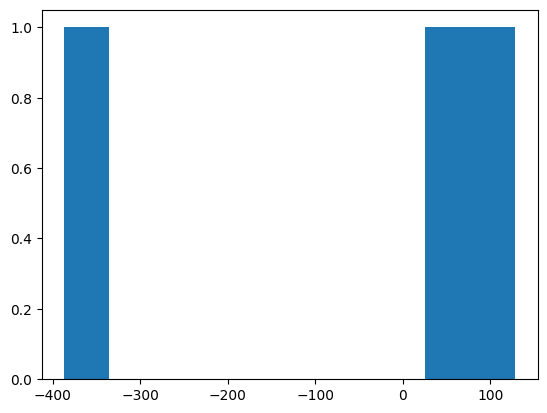

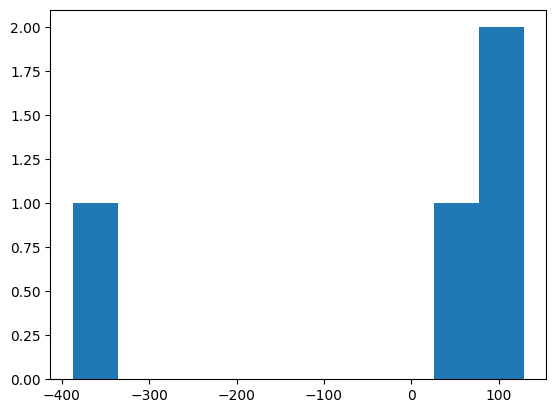

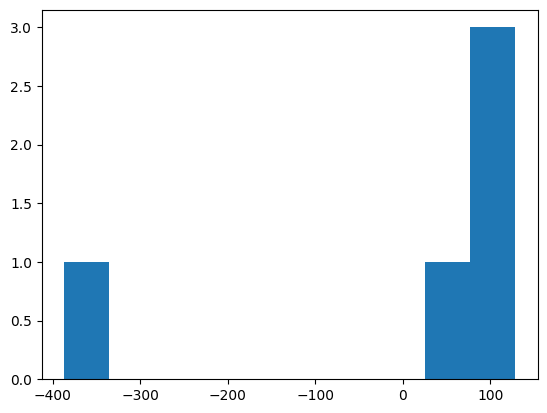

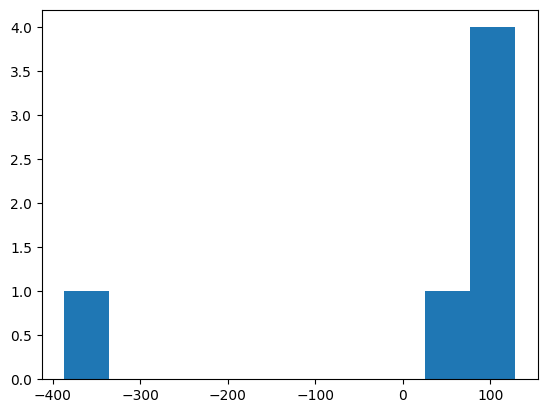

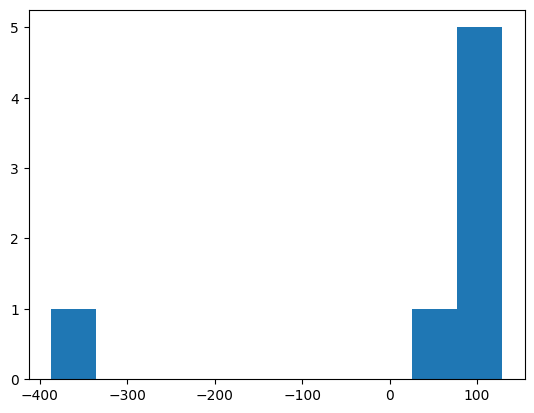

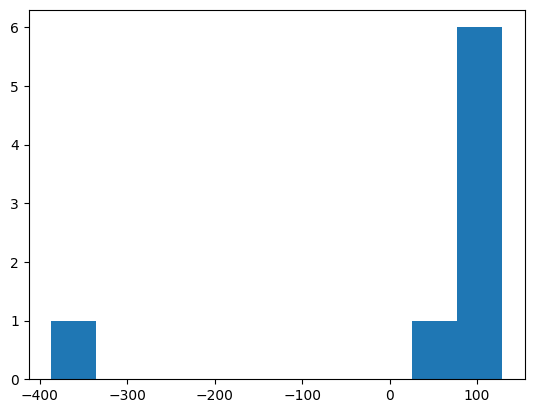

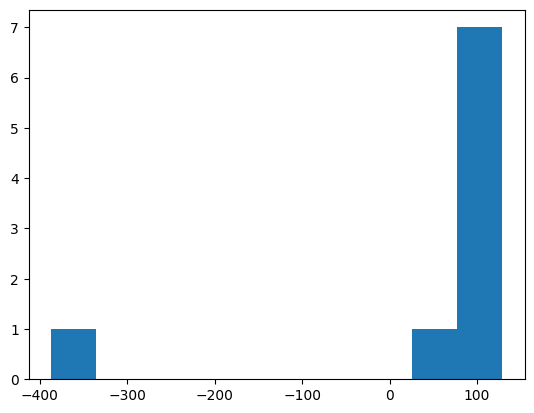

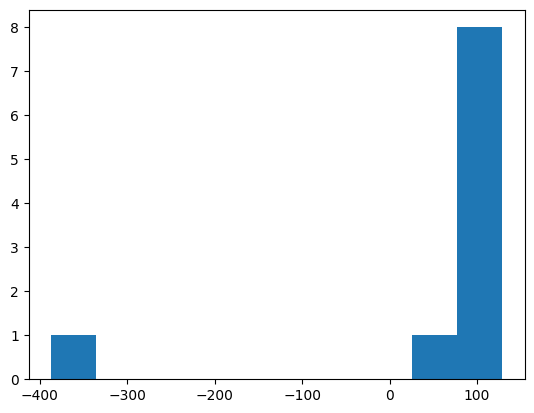

The Minkowski distance :  [-387.0, 128.58212447702383, (64.00151574457296+110.84862640394898j), (128.00001776218144+1.8757855084236931e-19j), (103.5541752456882+75.23651218785633j), (128.0000000007227+8.57097615863869e-33j), (115.32401509150661+55.537118607043645j), (128.00000000000003+6.064443025810493e-46j), (120.28065546059625+43.77857834568559j), (128.00000000000003+5.561108203778622e-59j)]


In [6]:
#A3
import math
FD_1=df.iloc[:,1:2]
FD_2=df.iloc[:,2:3]
FD1_Array=np.array(FD_1)
FD2_Array=np.array(FD_2)
Distance=0
Minkowski_distance=0
r=[]
#minkowski distance formula : sum 1 to n ((xi-yi)^r)^1/r
for i in range(1,11):
    for j in range(0,3):
        Distance=(FD1_Array[j]-FD2_Array[j])
        Power=math.pow(Distance,i)
        Minkowski_distance=Minkowski_distance+Power
        Minkowski_distance=pow(Minkowski_distance,1/i)
    r.append(Minkowski_distance)
    plt.hist(r,bins=10)
    plt.show()
print("The Minkowski distance : ",r)


In [7]:
from sklearn import preprocessing
lc=preprocessing.LabelEncoder()
df['5. Is not being able to hangout and meet your friends and classmates in any way affecting your mental health?']=lc.fit_transform(df['5. Is not being able to hangout and meet your friends and classmates in any way affecting your mental health?'])

In [8]:
#A4
from optparse import Values
from sklearn.model_selection import train_test_split
X= df.iloc[:, 1:2].values
y= df.iloc[:, 8].values
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.3)
print(X_train)
print(Y_train)


[[15]
 [19]
 [20]
 [18]
 [ 9]
 [20]
 [22]
 [19]
 [21]
 [19]
 [19]
 [23]
 [21]
 [37]
 [19]
 [44]
 [20]
 [20]
 [21]
 [20]
 [19]
 [20]
 [18]
 [18]
 [20]
 [15]
 [21]
 [24]
 [ 9]
 [42]
 [19]
 [21]
 [36]
 [21]
 [37]
 [19]
 [40]
 [21]
 [20]
 [19]
 [19]
 [12]
 [14]
 [19]
 [21]
 [18]
 [17]
 [19]
 [19]
 [19]
 [20]
 [19]
 [20]
 [18]
 [20]
 [21]
 [21]
 [18]
 [20]
 [19]
 [23]
 [22]
 [19]
 [21]
 [19]
 [19]
 [18]
 [20]
 [18]
 [19]
 [19]
 [44]
 [19]
 [19]
 [11]
 [21]
 [24]
 [20]
 [19]
 [19]
 [19]
 [21]
 [35]
 [20]
 [14]
 [19]
 [ 7]
 [20]
 [18]
 [16]
 [15]
 [19]
 [22]
 [40]
 [16]
 [22]
 [19]
 [19]
 [33]
 [20]
 [20]
 [41]
 [20]
 [19]
 [20]
 [45]
 [20]
 [21]
 [21]
 [20]
 [19]
 [19]
 [19]
 [11]
 [21]
 [21]
 [20]
 [21]
 [20]
 [19]
 [19]
 [20]
 [15]
 [ 6]
 [19]
 [21]
 [21]
 [ 9]
 [21]
 [22]
 [20]
 [20]]
[2 0 0 0 0 0 0 0 0 0 2 0 7 3 0 7 5 0 0 0 7 0 0 0 1 0 0 0 0 2 0 0 0 0 7 0 2
 0 0 0 1 0 0 0 0 0 0 0 5 0 3 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 7 1 2 0 0 3 3 0
 0 0 0 0 3 0 0 0 0 0 0 0 0 3 0 0 0 0 0 3 0 6 3 0 6 0 0 0 

In [9]:
from sklearn.model_selection import train_test_split
from optparse import Values
X=df.iloc[:,1:2].values
y=df.iloc[:,8].values
X_train, X_test, Y_train, Y_test=train_test_split(X, y, test_size=0.3)

In [10]:
X.ravel()


array([45, 20, 23, 19, 20, 20, 19, 19, 19, 19, 20, 20, 19, 19, 19, 19, 20,
       19, 19, 20, 18, 20, 20, 19, 21, 20, 19, 20, 20, 17, 20, 19, 20, 21,
       50, 19, 20, 23, 18, 20, 19, 19, 20, 20, 19, 20, 22, 20, 23, 19, 21,
       26, 18, 19, 19, 20, 20, 20, 23, 18, 35, 19, 21, 19, 25, 21, 19, 21,
       19, 22, 18, 20, 21, 21, 19, 19, 18, 20, 21, 14, 19, 19, 19, 24, 20,
       21, 19, 20, 21, 19, 21, 21, 19, 16, 14, 21, 18, 19, 22, 20, 19, 18,
       19, 19, 20, 21, 18, 21, 21, 23, 19, 21, 15, 20, 21, 20, 37, 11, 20,
       41, 20, 19, 19, 20, 21, 20, 20, 21,  9, 20,  7, 44, 18, 21, 19, 20,
       20, 19,  6, 19, 34, 20, 19, 42, 21, 18, 10, 22, 21, 21, 21, 22, 19,
       44, 23, 15, 21, 21, 19,  9, 40, 12, 19, 24, 24, 19, 18, 11, 44, 41,
       19, 15, 19, 19, 19, 19, 19, 20,  9, 15, 33, 15, 40, 21, 36, 16, 37,
       19, 14], dtype=int64)

In [11]:
y.ravel()


array([1, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 4, 2, 0, 2, 0, 0, 0, 0, 1, 0, 0,
       3, 3, 4, 0, 6, 0, 0, 0, 1, 0, 3, 0, 5, 0, 0, 0, 2, 0, 7, 0, 0, 0,
       3, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 5, 0, 5, 0,
       0, 4, 7, 2, 0, 0, 0, 1, 0, 0, 7, 0, 0, 0, 1, 0, 0, 0, 4, 0, 0, 0,
       1, 1, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 7, 0, 0, 0, 0, 0, 0, 1, 0, 3, 5, 1, 0, 0, 0, 7,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 4, 7, 0, 6, 1, 3,
       7, 2, 0, 0, 0, 0, 3, 0, 1, 0, 0, 0, 0, 0, 7, 0, 2, 1, 1, 3, 0, 3,
       0, 0, 0, 0, 6, 0, 2, 0, 0, 0, 3, 0, 0], dtype=int64)

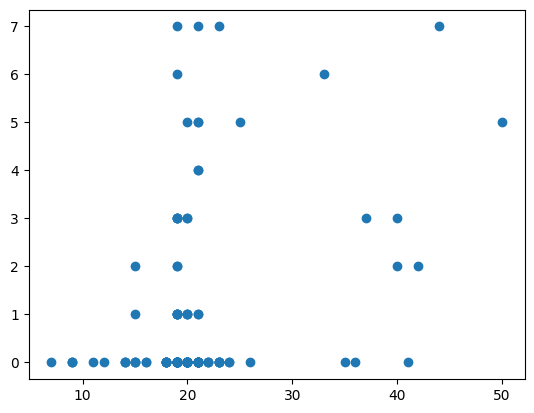

In [12]:
plt.scatter(X_train,Y_train)

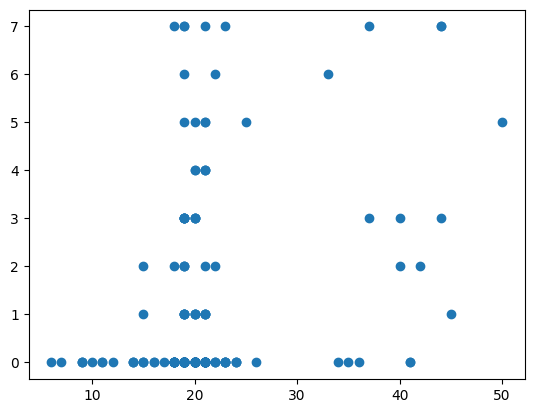

In [13]:
plt.scatter(X,y)

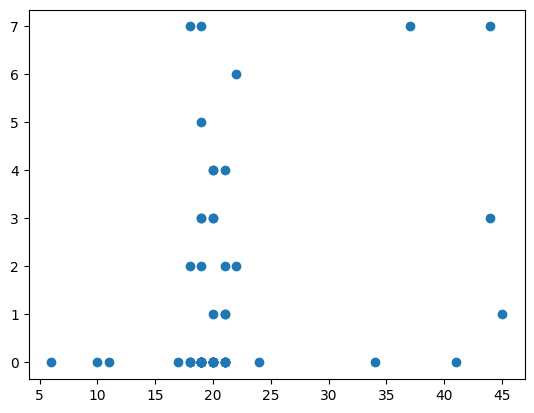

In [14]:
plt.scatter(X_test,Y_test)

In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X,y)
knn.predict(X_test)
knn.score(X_test,Y_test)


0.6491228070175439

In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X,y)
knn.predict(X_test)
knn.score(X_test,Y_test)

0.6491228070175439

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
'''
# Load the dataset
file_path = '/mnt/data/Project Dataset.xlsx'
df = pd.read_excel(file_path)'''

# Select features (X) and target (y)
X = df.iloc[:, 1:2].values  # Selecting the 2nd column for X (feature)
y = df.iloc[:, 8].values    # Selecting the 4th column for y (target)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# A5: Initialize and train the kNN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# A6: Test the accuracy of the kNN classifier
accuracy = knn.score(X_test, y_test)
print(f"Accuracy of kNN classifier: {accuracy:.2f}")

# A7: Predict the labels for the test set
y_pred = knn.predict(X_test)
print("Predicted labels for the test set:", y_pred)

# A7: Perform classification for a specific test vector
# Let's assume you want to predict the class for the first test vector
test_vect = X_test[0].reshape(1, -1)  # Reshape to 2D as required by predict()
predicted_class = knn.predict(test_vect)
print(f"Predicted class for the test vector {test_vect.flatten()}: {predicted_class[0]}")


Accuracy of kNN classifier: 0.67
Predicted labels for the test set: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 7 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Predicted class for the test vector [36]: 0


In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder


# Select features (X) and target (y)
X = df.iloc[:, 1:2].values  # Selecting the 2nd column for X (feature)
y = df.iloc[:, 3].values    # Selecting the 4th column for y (target)

# Convert continuous target variable y to categorical if necessary
# Example: Bin the continuous target variable into discrete categories
bins = np.linspace(min(y), max(y), 4)  # Example: 3 bins for simplicity
y_binned = np.digitize(y, bins)  # Convert y to categorical

# Alternatively, if y already represents classes but is continuous, use LabelEncoder
# label_encoder = LabelEncoder()
# y_binned = label_encoder.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binned, test_size=0.3, random_state=42)

# A5: Initialize and train the kNN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# A6: Test the accuracy of the kNN classifier
accuracy = knn.score(X_test, y_test)
print(f"Accuracy of kNN classifier: {accuracy:.2f}")

# A7: Predict the labels for the test set
y_pred = knn.predict(X_test)
print("Predicted labels for the test set:", y_pred)

# A7: Perform classification for a specific test vector
test_vect = X_test[0].reshape(1, -1)
predicted_class = knn.predict(test_vect)
print(f"Predicted class for the test vector {test_vect.flatten()}: {predicted_class[0]}")


Accuracy of kNN classifier: 0.65
Predicted labels for the test set: [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2
 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
Predicted class for the test vector [36]: 2


In [19]:
X_train.shape
Y_train.shape

(132,)

In [20]:
import time
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, f1_score, precision_score, roc_auc_score

# Initialize the KNN classifier
start = time.time()
KNN = KNeighborsClassifier()

# Fit the model on training data
KNN.fit(X_train, y_train)

# Calculate the time taken for fitting the model
stop = time.time()

# Print the accuracy score for train and test data
print("The accuracy score of train data:", KNN.score(X_train, y_train))
print("The accuracy score of test data:", KNN.score(X_test, y_test))
print("The time taken to get the score of KNN classifier:", stop - start)

# Predict the values for test and train data
prediction_X_test = KNN.predict(X_test)
prediction_X_train = KNN.predict(X_train)

# Compute the confusion matrix for the test data
cm = confusion_matrix(y_test, prediction_X_test)

# Print the F1 score for train and test data
print("The F1 score of training data:", round(f1_score(y_train, prediction_X_train, average='weighted'), 5))
print("The F1 score of test data:", round(f1_score(y_test, prediction_X_test,average='weighted'), 5))

# Print the precision score for train and test data
print("The precision score of training data:", round(precision_score(y_train, prediction_X_train,average='weighted'), 5))
print("The precision score of test data:", round(precision_score(y_test, prediction_X_test,average='weighted'), 5))
'''
# Print the ROC AUC score for train and test data
print("The ROC AUC score of training data:", round(roc_auc_score(y_train, prediction_X_train,multi_class='ovo'), 5))
print("The ROC AUC score of test data:", round(roc_auc_score(y_test, prediction_X_test,multi_class='ovr'), 5))
'''
# Print the confusion matrix
print(cm)


The accuracy score of train data: 0.7196969696969697
The accuracy score of test data: 0.6491228070175439
The time taken to get the score of KNN classifier: 0.0020003318786621094
The F1 score of training data: 0.66681
The F1 score of test data: 0.56471
The precision score of training data: 0.63628
The precision score of test data: 0.6031
[[ 4 12  0]
 [ 1 33  0]
 [ 0  7  0]]


c:\Users\Hitesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Hitesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
import time
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, f1_score, precision_score, roc_auc_score

# Initialize the KNN classifier
start = time.time()
KNN = KNeighborsClassifier()

# Fit the model on training data
KNN.fit(X_train, y_train)

# Calculate the time taken for fitting the model
stop = time.time()

# Print the accuracy score for train and test data
print("The accuracy score of train data:", KNN.score(X_train, y_train))
print("The accuracy score of test data:", KNN.score(X_test, y_test))
print("The time taken to get the score of KNN classifier:", stop - start)

# Predict the values for test and train data
prediction_X_test = KNN.predict(X_test)
prediction_X_train = KNN.predict(X_train)

# Print the F1 score for train and test data
print("The F1 score of training data:", round(f1_score(y_train, prediction_X_train, average='weighted'), 5))
print("The F1 score of test data:", round(f1_score(y_test, prediction_X_test,average='weighted'), 5))

# Print the precision score for train and test data
print("The precision score of training data:", round(precision_score(y_train, prediction_X_train,average='weighted'), 5))
print("The precision score of test data:", round(precision_score(y_test, prediction_X_test,average='weighted'), 5))

# Compute the confusion matrix for the test data
cm = confusion_matrix(y_test, prediction_X_test)

# Print the F1 score for train and test data
print("The F1 score of training data:", round(f1_score(y_train, prediction_X_train, average='weighted'), 5))
print("The F1 score of test data:", round(f1_score(y_test, prediction_X_test,average='weighted'), 5))

# Print the precision score for train and test data
print("The precision score of training data:", round(precision_score(y_train, prediction_X_train,average='weighted'), 5))
print("The precision score of test data:", round(precision_score(y_test, prediction_X_test,average='weighted'), 5))
'''
# Print the ROC AUC score for train and test data
print("The ROC AUC score of training data:", round(roc_auc_score(y_train, prediction_X_train,multi_class='ovo'), 5))
print("The ROC AUC score of test data:", round(roc_auc_score(y_test, prediction_X_test,multi_class='ovr'), 5))
'''
# Print the confusion matrix
print(cm)


The accuracy score of train data: 0.7196969696969697
The accuracy score of test data: 0.6491228070175439
The time taken to get the score of KNN classifier: 0.0010008811950683594
The F1 score of training data: 0.66681
The F1 score of test data: 0.56471
The precision score of training data: 0.63628
The precision score of test data: 0.6031
The F1 score of training data: 0.66681
The F1 score of test data: 0.56471
The precision score of training data: 0.63628
The precision score of test data: 0.6031
[[ 4 12  0]
 [ 1 33  0]
 [ 0  7  0]]


c:\Users\Hitesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Hitesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Hitesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c

[2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 1 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2
 2 1 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 1 2 1 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 1 2
 2 2 2 2 2 2 1 1 2 2 2 1 2 1 2 2 2 2 2 1 2 2 2 1 2 2 2 2 2 2 1 1 2 1 2 2 2
 1 2 2 1]


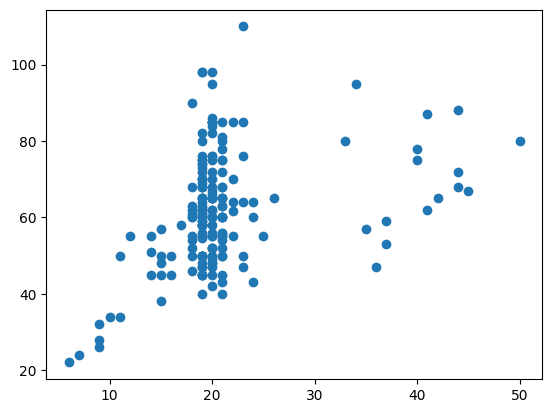

In [22]:
#A5
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
print(knn.predict(X))
plt.scatter(X,y)
knn.predict(X_test)
plt.show()